In [24]:
# # import cuml
# import cupy as cp

# # print("cuML version:", cuml.__version__)
# print("GPU available:", cp.cuda.runtime.getDeviceCount())

Import the required packages. It is recommended to check your GPU version beforehand.

In [ ]:
import mule as mu
import scanpy as sc
import pandas as pd
import numpy as np

In [ ]:
import os
os.getcwd()

'/home/jinpu/mule/MULE'

input use case data

In [ ]:
adata  = sc.read_h5ad('/home/jinpu/data/mule_test/hie_intro.h5ad')
UMI_info = pd.read_csv('/home/jinpu/data/mule_test/hie_intro.csv',index_col =0)

First, perform HVG (highly variable gene) selection (optimal).

Since we need to calculate mutual exclusivity scores for all gene pairs, you can optionally pre-filter features based on your needs.

In [28]:
mu.pre_process.hvg(adata)

AnnData object with n_obs × n_vars = 1160 × 19188
    var: 'highly_variable'

In [29]:
adata = adata[:,adata.var['highly_variable'] == True]

Calulate each gene pair ME score

In [30]:
mu.tax.mutually_exclusively_detect_CME(adata)

View the mutual exclusivity score distribution.

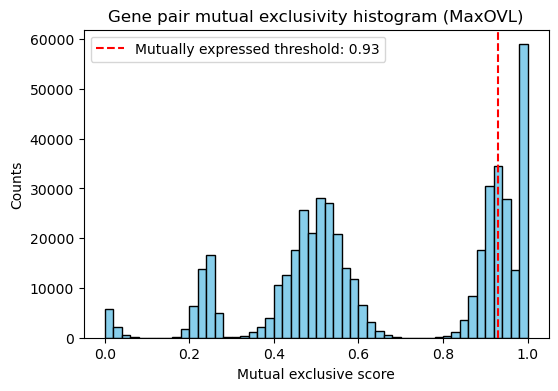

In [31]:
mu.vis.polar_score(adata)

Filter gene pairs with low mutual exclusivity scores. 

Here, we use 0.8 as a preliminary cutoff for the mutual exclusivity score.

In [32]:
mu.tax.build_opposite_graph(adata, threshold = 0.8)

Build mutually exclusive gene graph
Calculate original graph degree


After filtering all mutually exclusive gene pairs, we construct a mutual exclusivity graph, where each edge represents a pair of mutually exclusive genes. 

The degree distribution of all nodes in this graph can then be visualized.

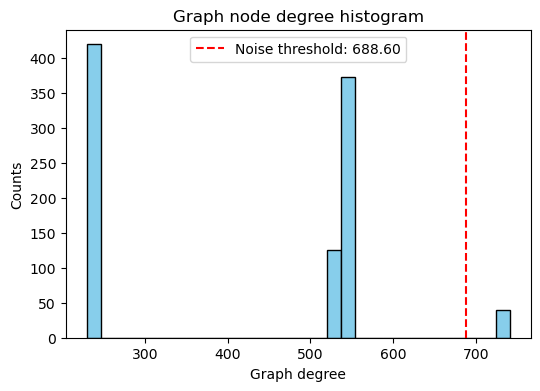

np.float64(688.6017993151195)

In [33]:
mu.vis.graph_degree(adata)

Here, we can optionally filter out genes with very low degrees, as they may represent noise.

In [34]:
mu.tax.get_subgraph(adata,threshold=50)

Filter low-degree nodes (denoise genes)


Hierarchical clustering is applied to the mutual exclusivity graph to group genes into modules.

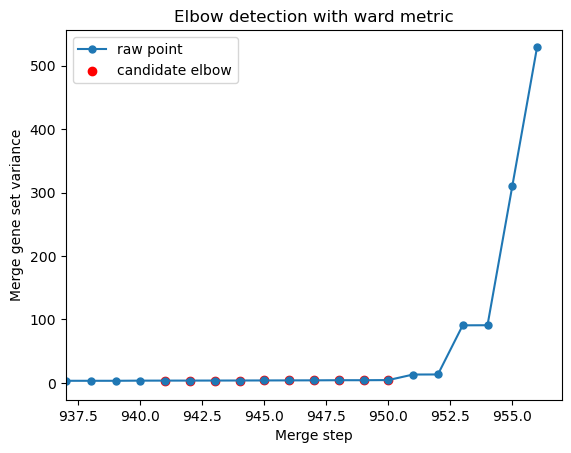

Linkage info (last 20 steps):
937      3.357563
938      3.357688
939      3.357810
940      3.592780
941      3.593012
942      3.725350
943      3.728878
944      3.794972
945      3.830979
946      4.081380
947      4.082103
948      4.272978
949      4.273903
950      4.465099
951     13.232536
952     13.337916
953     90.797097
954     90.946393
955    310.805405
956    529.693373
Name: 2, dtype: float64


In [35]:
mu.vis.merge_strategy(adata)

Select the inflection point to define cluster boundaries.

In [36]:
mu.tax.bipartite_embedding_perm_fast(adata,merge_threshold=10)

Visualize the gene module mutual exclusivity graph.

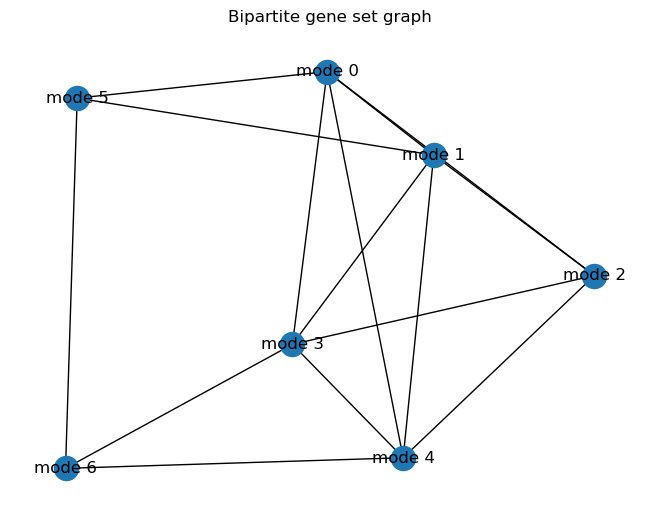

In [37]:
mu.vis.mode_graph(adata)

Construct a hierarchical tree of gene modules.

In [38]:
mu.tax.build_taxonomy_tree(adata)

Create a root marker set
root set
├── mode 5
│   ├── mode 2
│   ├── mode 3
│   └── mode 4
└── mode 6
    ├── mode 0
    └── mode 1



Get PCA

In [39]:
sc.tl.pca(adata)

Perform dimensionality reduction on the mutual exclusivity information using metric learning. 

The results are stored in adata.obsm['X_custom'].

In [17]:
mu.tax.train_triplet_embedding(adata, adata.uns['mule']['taxonomy_tree'])

Ep    0/600 | loss=5.1153
Ep   20/600 | loss=4.4547
Ep   40/600 | loss=3.8489
Ep   60/600 | loss=3.2294
Ep   80/600 | loss=2.6308
Ep  100/600 | loss=2.0151
Ep  120/600 | loss=1.3995
Ep  140/600 | loss=0.7999
Ep  160/600 | loss=0.1939
Ep  180/600 | loss=0.3172
Ep  200/600 | loss=0.2482
Ep  220/600 | loss=0.1615
Ep  240/600 | loss=0.0853
Ep  260/600 | loss=0.0329
Ep  280/600 | loss=0.0239
Ep  300/600 | loss=0.0523
Ep  320/600 | loss=0.0185
Ep  340/600 | loss=0.0185
Ep  360/600 | loss=0.1659
Ep  380/600 | loss=0.0905
Ep  400/600 | loss=0.0354
Ep  420/600 | loss=0.0247
Ep  440/600 | loss=0.0190
Ep  460/600 | loss=0.0162
Ep  480/600 | loss=0.0151
Ep  500/600 | loss=0.0141
Ep  520/600 | loss=0.0157
Ep  540/600 | loss=0.0159
Ep  560/600 | loss=0.1658
Ep  580/600 | loss=0.0852
Ep  600/600 | loss=0.0226


In [18]:
adata.obsm

AxisArrays with keys: X_pca, X_custom, X_umap